In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling3D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\shree\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [8]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
    
)

In [9]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
Shape of x_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


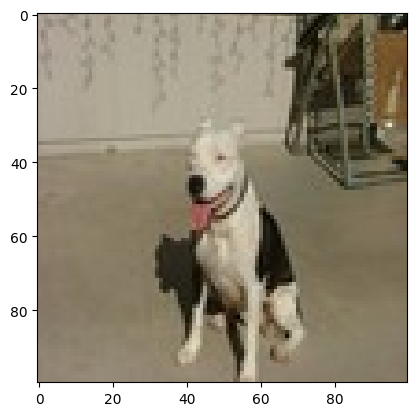

In [10]:

idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')   # for binary classification
])




c:\Users\shree\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=1)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.4860 - loss: 0.7059 - val_accuracy: 0.4900 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5225 - loss: 0.6927 - val_accuracy: 0.4975 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5170 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5285 - loss: 0.6916 - val_accuracy: 0.5400 - val_loss: 0.6804
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5445 - loss: 0.6848 - val_accuracy: 0.5600 - val_loss: 0.6788
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5375 - loss: 0.6845 - val_accuracy: 0.5850 - val_loss: 0.6695
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5490 - loss: 0.6859 - val_accuracy: 0.6450 - val_loss: 0.6739
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5645 - loss: 0.6832 - val_accuracy: 0.6100 - 

In [16]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5975 - loss: 0.6698


[0.6697791814804077, 0.5975000262260437]

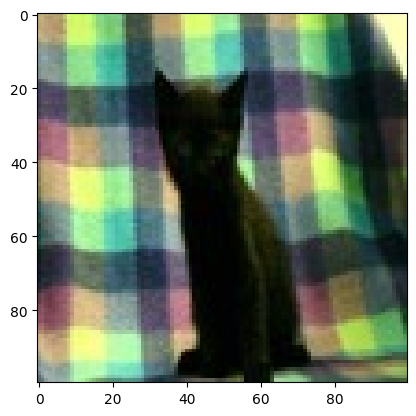

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
our model says it is a : cat


In [17]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print("our model says it is a :",pred)

In [18]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5


In [19]:
pip install matplotlib tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
